# Confirmation Model

### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Looding dataset

In [2]:
# Load the data
file_path = 'output.xlsx'
data = pd.read_excel(file_path)

In [3]:
data

,text,original intent,top_intent_1,top_intent_1_softmax,top_intent_1_normalized,top_intent_2,top_intent_2_softmax,top_intent_2_normalized,simple_normalized_diff,status
0,از تو چه پنهون دلم خیلی گرفته. برام دعای جوشن ...,adie,adie,0.999934,0.278760,telephone,0.000006,0.085561,0.193199,confirmed
1,خیلی ها رو دیدم که با دعای مکارم الاخلاق حاجت ...,adie,adie,0.999949,0.289170,telephone,0.000005,0.088629,0.200541,confirmed
2,دعایی که برای مشکلات و دشواری ها توصیه شده دعا...,adie,adie,0.999950,0.274192,ask_sendpic,0.000007,0.092028,0.182164,confirmed
3,خیلی مشکلات دارم تو زندگیم دعایی که برای رفع م...,adie,adie,0.999806,0.258460,zekr,0.000025,0.093728,0.164733,confirmed
4,یکی امروز بهم گفت که دعای حدیث کسا خیلی کار را...,adie,adie,0.999938,0.262065,ask_sendpic,0.000009,0.093932,0.168134,confirmed
...,...,...,...,...,...,...,...,...,...,...
49689,چه شرکت‌هایی امکان عرضه سهام در بورس را دارند؟,oos,oos,0.999479,0.273961,investment_money,0.000457,0.149729,0.124231,confirmed
49690,پذیره‌نویسی چیست؟,oos,oos,0.997950,0.235545,word_meaning,0.001162,0.128975,0.106571,confirmed
49691,بازرس کیست و چه مسئولیتی در شرکت دارد؟,oos,oos,0.999650,0.251062,what_is_operator,0.000267,0.131847,0.119215,confirmed
49692,بازرس علی البدل چه کسی است؟,oos,oos,0.999969,0.296078,faq_chatbot,0.000007,0.102774,0.193304,confirmed


### EDA and Visualization

In [4]:
# Check the distribution of the classes
class_distribution = data['status'].value_counts(normalize=True)
print("Class distribution:")
display(class_distribution)

Class distribution:


status
confirmed    0.969695
unclear      0.021753
doubt        0.008552
Name: proportion, dtype: float64

In [5]:
# Convert relevant columns to numeric
data['top_intent_1_softmax'] = pd.to_numeric(data['top_intent_1_softmax'], errors='coerce')
data['top_intent_1_normalized'] = pd.to_numeric(data['top_intent_1_normalized'], errors='coerce')
data['top_intent_2_softmax'] = pd.to_numeric(data['top_intent_2_softmax'], errors='coerce')
data['top_intent_2_normalized'] = pd.to_numeric(data['top_intent_2_normalized'], errors='coerce')
data['simple_normalized_diff'] = pd.to_numeric(data['simple_normalized_diff'], errors='coerce')

# Drop rows with NaN values
data = data.dropna()

# Ensure 'status' is a categorical variable
data['status'] = data['status'].astype('category')

In [6]:
data

,text,original intent,top_intent_1,top_intent_1_softmax,top_intent_1_normalized,top_intent_2,top_intent_2_softmax,top_intent_2_normalized,simple_normalized_diff,status
0,از تو چه پنهون دلم خیلی گرفته. برام دعای جوشن ...,adie,adie,0.999934,0.278760,telephone,0.000006,0.085561,0.193199,confirmed
1,خیلی ها رو دیدم که با دعای مکارم الاخلاق حاجت ...,adie,adie,0.999949,0.289170,telephone,0.000005,0.088629,0.200541,confirmed
2,دعایی که برای مشکلات و دشواری ها توصیه شده دعا...,adie,adie,0.999950,0.274192,ask_sendpic,0.000007,0.092028,0.182164,confirmed
3,خیلی مشکلات دارم تو زندگیم دعایی که برای رفع م...,adie,adie,0.999806,0.258460,zekr,0.000025,0.093728,0.164733,confirmed
4,یکی امروز بهم گفت که دعای حدیث کسا خیلی کار را...,adie,adie,0.999938,0.262065,ask_sendpic,0.000009,0.093932,0.168134,confirmed
...,...,...,...,...,...,...,...,...,...,...
49689,چه شرکت‌هایی امکان عرضه سهام در بورس را دارند؟,oos,oos,0.999479,0.273961,investment_money,0.000457,0.149729,0.124231,confirmed
49690,پذیره‌نویسی چیست؟,oos,oos,0.997950,0.235545,word_meaning,0.001162,0.128975,0.106571,confirmed
49691,بازرس کیست و چه مسئولیتی در شرکت دارد؟,oos,oos,0.999650,0.251062,what_is_operator,0.000267,0.131847,0.119215,confirmed
49692,بازرس علی البدل چه کسی است؟,oos,oos,0.999969,0.296078,faq_chatbot,0.000007,0.102774,0.193304,confirmed


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   text                     49694 non-null  object  
 1   original intent          49694 non-null  object  
 2   top_intent_1             49694 non-null  object  
 3   top_intent_1_softmax     49694 non-null  float64 
 4   top_intent_1_normalized  49694 non-null  float64 
 5   top_intent_2             49694 non-null  object  
 6   top_intent_2_softmax     49694 non-null  float64 
 7   top_intent_2_normalized  49694 non-null  float64 
 8   simple_normalized_diff   49694 non-null  float64 
 9   status                   49694 non-null  category
dtypes: category(1), float64(5), object(4)
memory usage: 3.5+ MB


In [38]:
data.describe()

,top_intent_1_softmax,top_intent_1_normalized,top_intent_2_softmax,top_intent_2_normalized,simple_normalized_diff
count,49694.000000,49694.000000,4.969400e+04,49694.000000,49694.000000
mean,0.993802,0.279883,3.981034e-03,0.108104,0.171779
std,0.045594,0.027405,2.997659e-02,0.018308,0.038135
min,0.137079,0.117105,7.113485e-07,0.075143,0.000090
25%,0.999768,0.268479,9.669527e-06,0.095454,0.155793
50%,0.999892,0.283508,2.307348e-05,0.102714,0.177723
75%,0.999943,0.297080,7.680952e-05,0.115820,0.195914
max,0.999994,0.365070,4.939552e-01,0.258684,0.283575


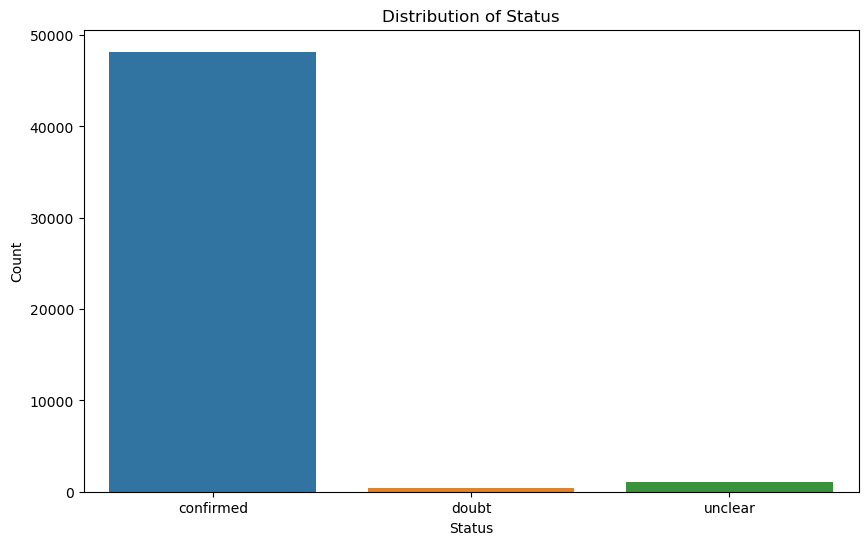

In [39]:
# Plot the distribution of 'status'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='status')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

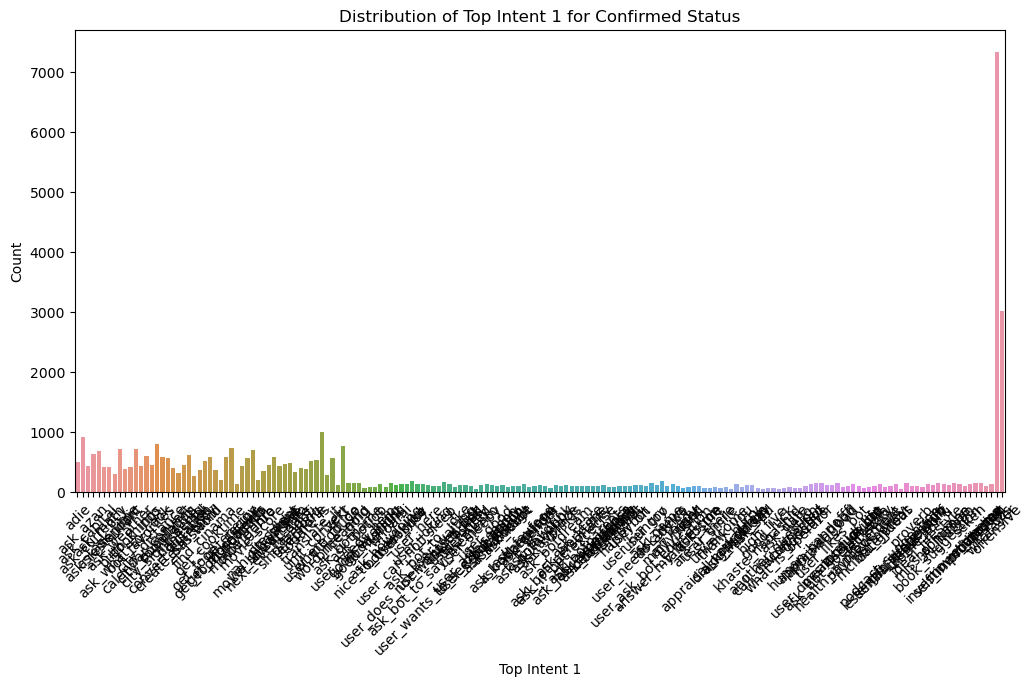

In [40]:
# Plot the distribution of 'top_intent_1' for status 'confirmed'
confirmed_data = data[data['status'] == 'confirmed']

plt.figure(figsize=(12, 6))
sns.countplot(data=confirmed_data, x='top_intent_1')
plt.title('Distribution of Top Intent 1 for Confirmed Status')
plt.xlabel('Top Intent 1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

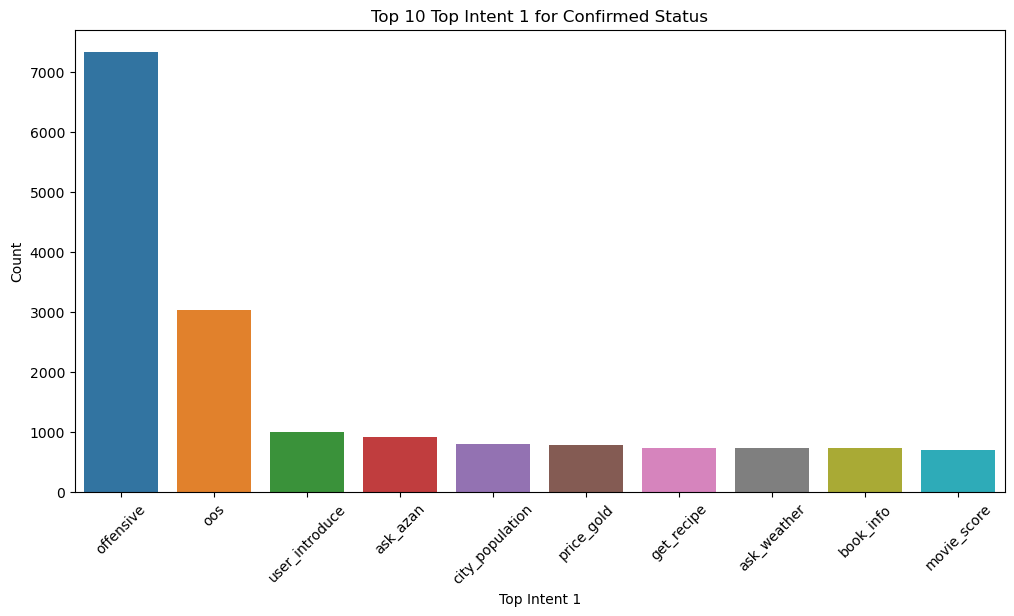

In [41]:
# Get the top 10 'top_intent_1' for status 'confirmed'
top_10_intents = confirmed_data['top_intent_1'].value_counts().head(10)

# Plot the top 10 'top_intent_1' for status 'confirmed'
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_intents.index, y=top_10_intents.values)
plt.title('Top 10 Top Intent 1 for Confirmed Status')
plt.xlabel('Top Intent 1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

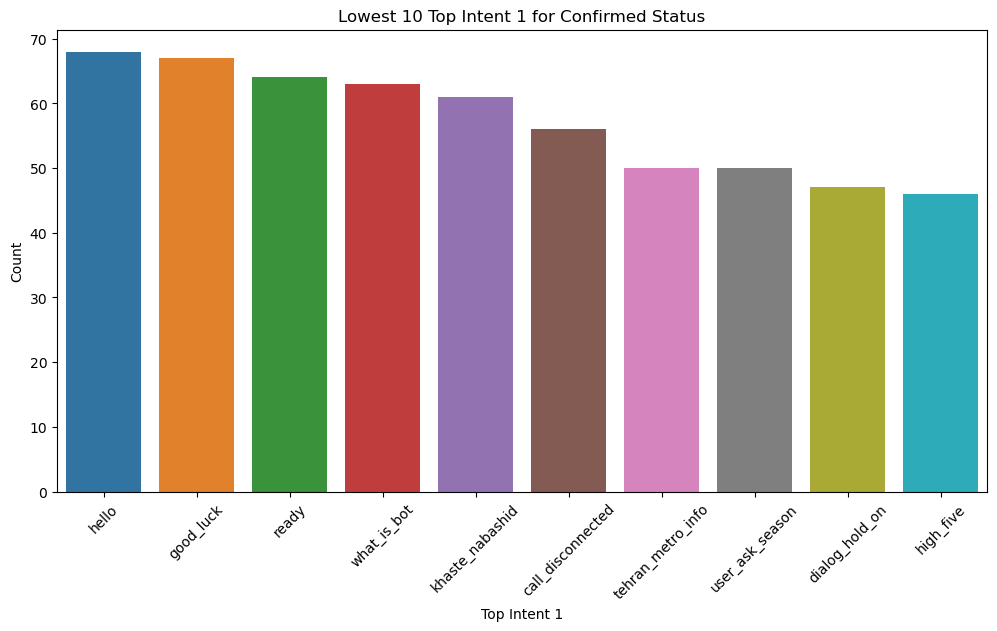

In [42]:
# Get the lowest 10 'top_intent_1' for status 'confirmed'
lowest_10_intents = confirmed_data['top_intent_1'].value_counts().tail(10)

# Plot the lowest 10 'top_intent_1' for status 'confirmed'
plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_10_intents.index, y=lowest_10_intents.values)
plt.title('Lowest 10 Top Intent 1 for Confirmed Status')
plt.xlabel('Top Intent 1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [43]:
# Plot the distribution of 'original intent' for status 'doubt'
doubt_data = data[data['status'] == 'doubt']

# Get the top 10 'original intent' for status 'doubt'
top_10_doubt_intents = doubt_data['original intent'].value_counts().head(10)

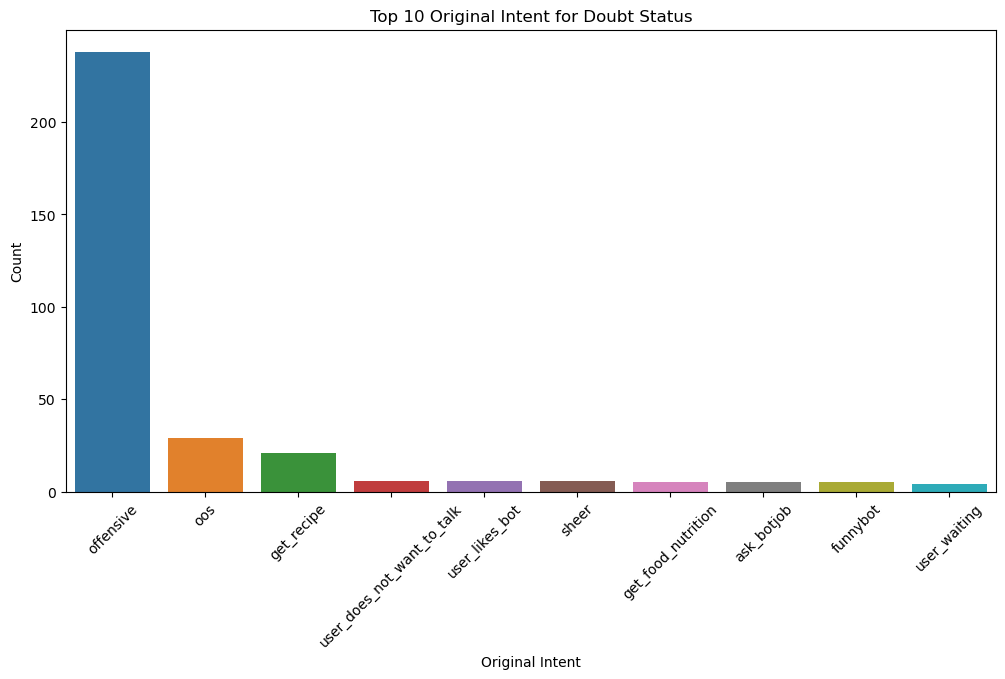

In [44]:
# Plot the top 10 'original intent' for status 'doubt'
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_doubt_intents.index, y=top_10_doubt_intents.values)
plt.title('Top 10 Original Intent for Doubt Status')
plt.xlabel('Original Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



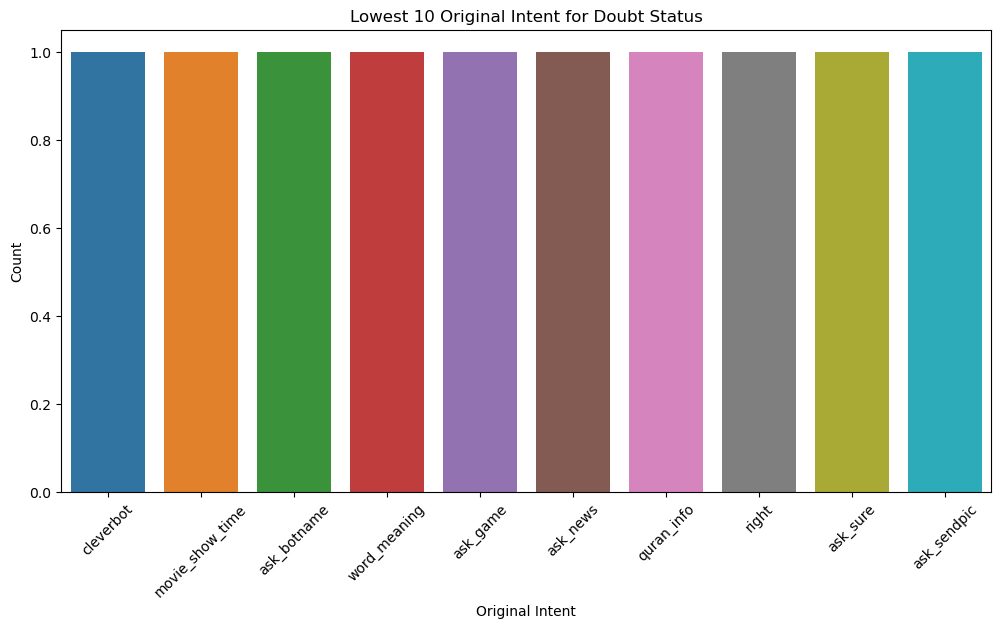

In [45]:
# Get the lowest 10 'original intent' for status 'doubt'
lowest_10_doubt_intents = doubt_data['original intent'].value_counts().tail(10)

# Plot the lowest 10 'original intent' for status 'doubt'
plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_10_doubt_intents.index, y=lowest_10_doubt_intents.values)
plt.title('Lowest 10 Original Intent for Doubt Status')
plt.xlabel('Original Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

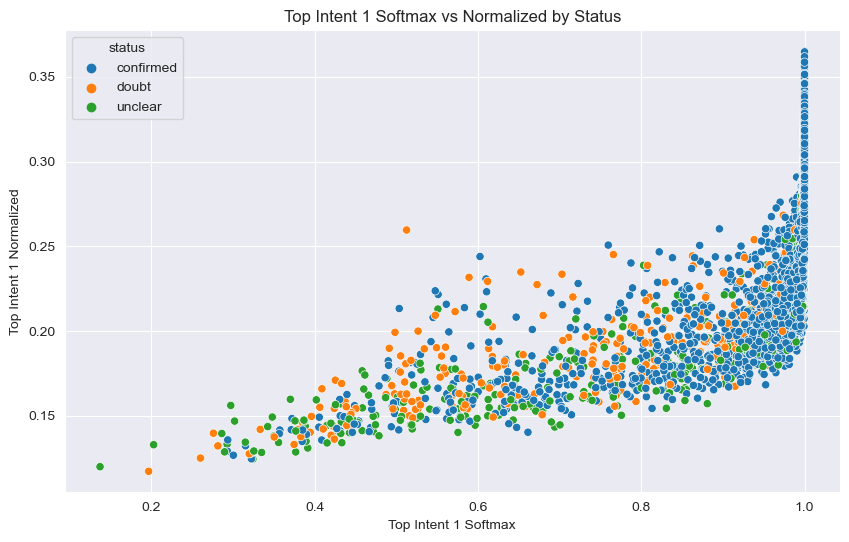

In [7]:
# Scatter plots for each pair of scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='top_intent_1_softmax', y='top_intent_1_normalized', hue='status')
plt.title('Top Intent 1 Softmax vs Normalized by Status')
plt.xlabel('Top Intent 1 Softmax')
plt.ylabel('Top Intent 1 Normalized')
plt.show()


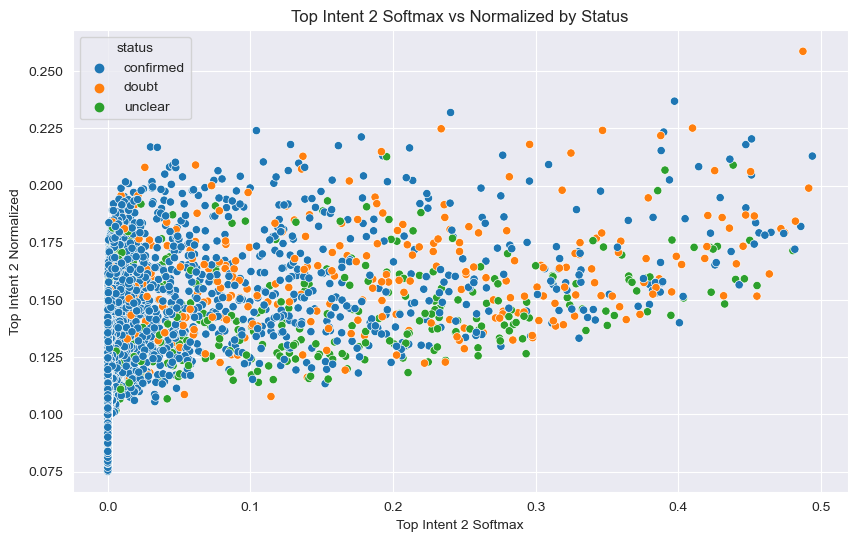

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='top_intent_2_softmax', y='top_intent_2_normalized', hue='status')
plt.title('Top Intent 2 Softmax vs Normalized by Status')
plt.xlabel('Top Intent 2 Softmax')
plt.ylabel('Top Intent 2 Normalized')
plt.show()

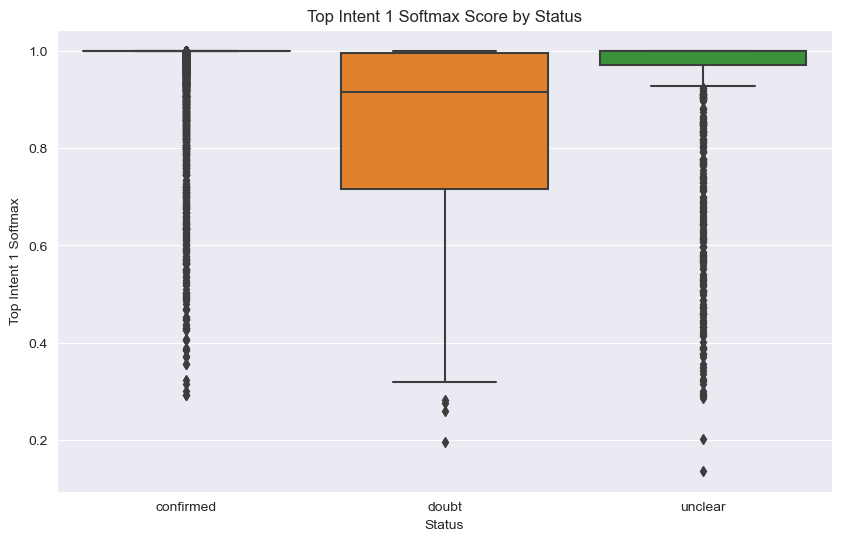

In [9]:
# Box plots for each score by status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='status', y='top_intent_1_softmax')
plt.title('Top Intent 1 Softmax Score by Status')
plt.xlabel('Status')
plt.ylabel('Top Intent 1 Softmax')
plt.show()

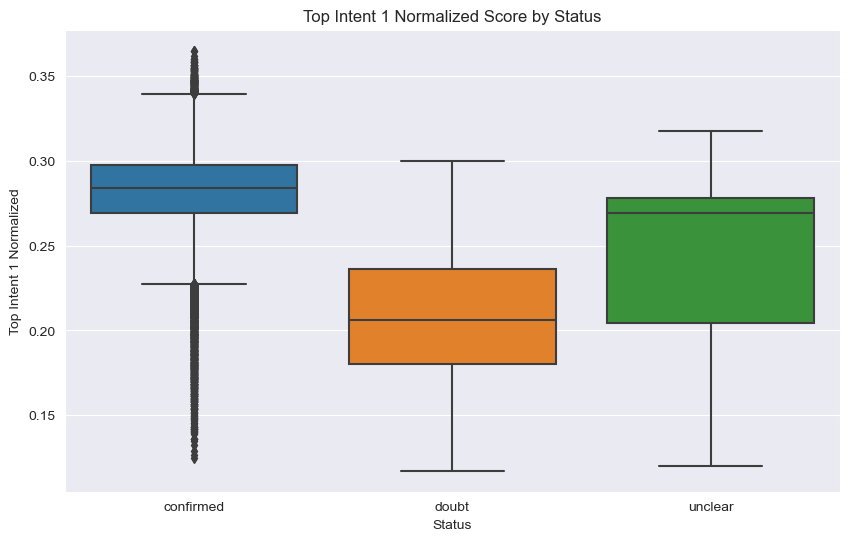

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='status', y='top_intent_1_normalized')
plt.title('Top Intent 1 Normalized Score by Status')
plt.xlabel('Status')
plt.ylabel('Top Intent 1 Normalized')
plt.show()

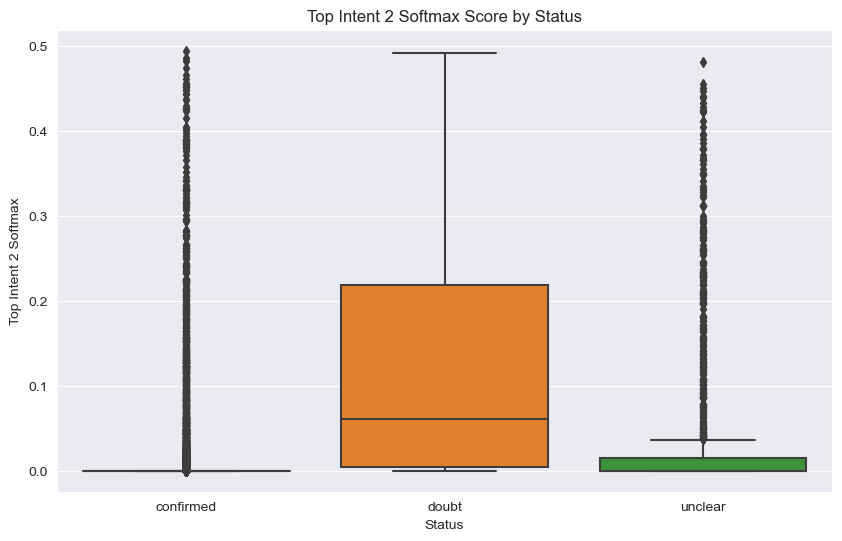

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='status', y='top_intent_2_softmax')
plt.title('Top Intent 2 Softmax Score by Status')
plt.xlabel('Status')
plt.ylabel('Top Intent 2 Softmax')
plt.show()

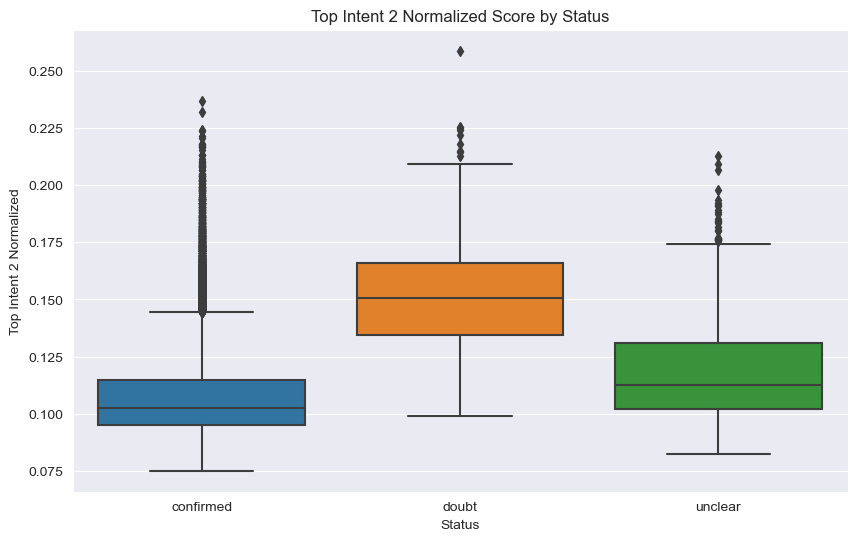

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='status', y='top_intent_2_normalized')
plt.title('Top Intent 2 Normalized Score by Status')
plt.xlabel('Status')
plt.ylabel('Top Intent 2 Normalized')
plt.show()

In [17]:
# Calculate descriptive statistics for 'top_intent_2_normalized' by status
descriptive_stats = data.groupby('status')['top_intent_2_normalized'].describe()
print(descriptive_stats)

             count      mean       std       min       25%       50%  \
status                                                                 
confirmed  48188.0  0.107465  0.017573  0.075143  0.095268  0.102372   
doubt        425.0  0.152013  0.024686  0.099271  0.134499  0.150601   
unclear     1081.0  0.119352  0.022417  0.082559  0.102250  0.112787   

                75%       max  
status                         
confirmed  0.115001  0.236895  
doubt      0.165788  0.258684  
unclear    0.131135  0.212619  


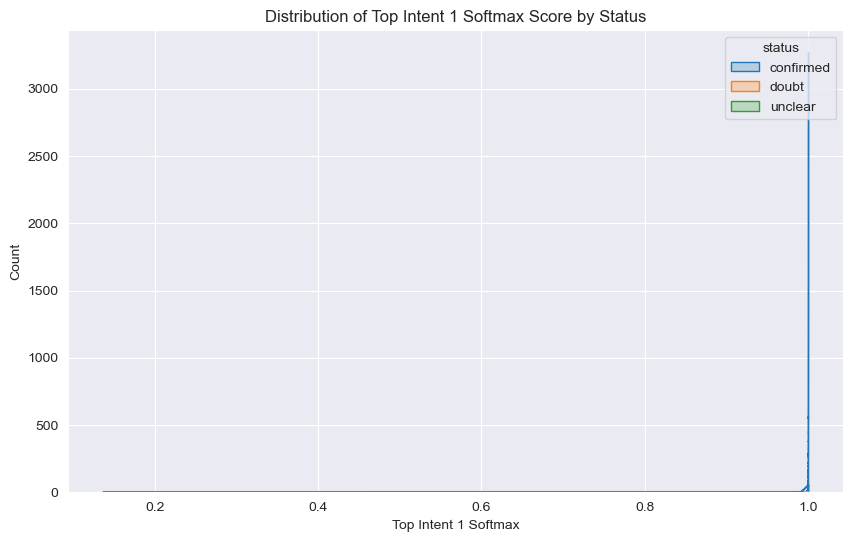

In [13]:
# Histograms with KDE for each score by status
plt.figure(figsize=(10, 6))
sns.histplot(data, x='top_intent_1_softmax', hue='status', kde=True, element="step")
plt.title('Distribution of Top Intent 1 Softmax Score by Status')
plt.xlabel('Top Intent 1 Softmax')
plt.ylabel('Count')
plt.show()

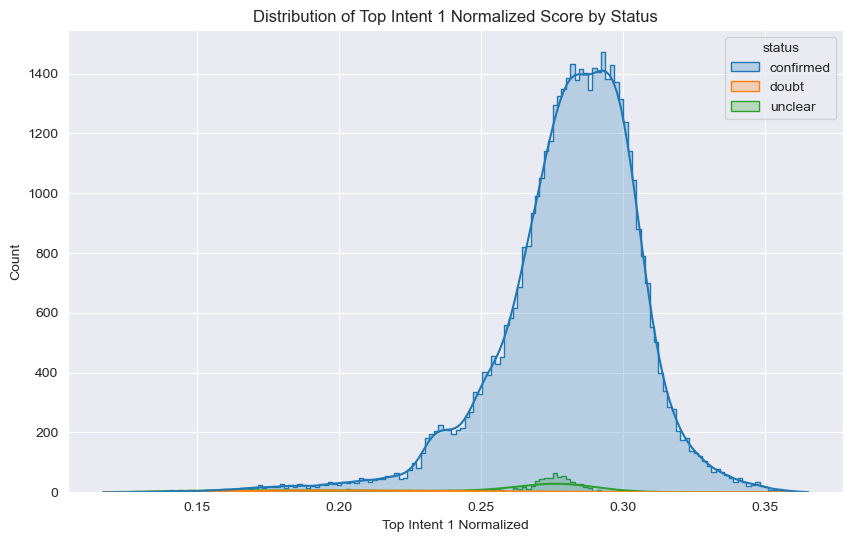

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='top_intent_1_normalized', hue='status', kde=True, element="step")
plt.title('Distribution of Top Intent 1 Normalized Score by Status')
plt.xlabel('Top Intent 1 Normalized')
plt.ylabel('Count')
plt.show()


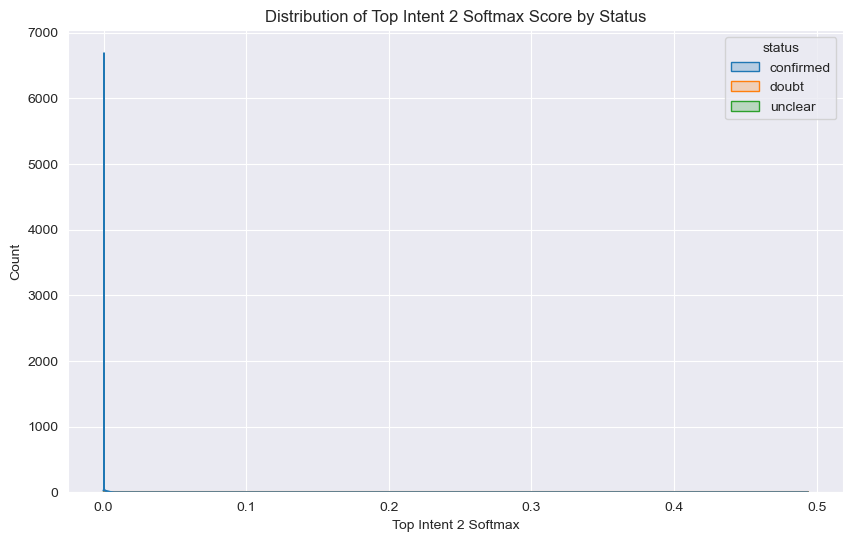

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='top_intent_2_softmax', hue='status', kde=True, element="step")
plt.title('Distribution of Top Intent 2 Softmax Score by Status')
plt.xlabel('Top Intent 2 Softmax')
plt.ylabel('Count')
plt.show()

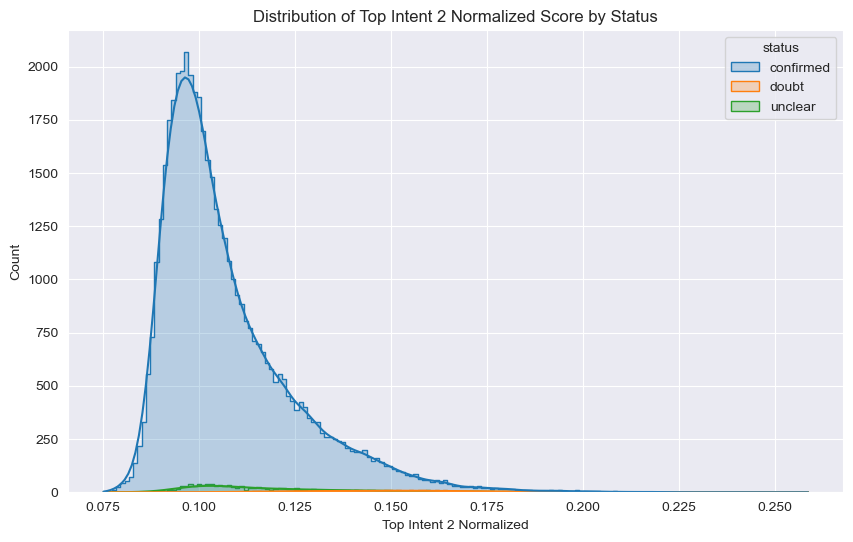

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='top_intent_2_normalized', hue='status', kde=True, element="step")
plt.title('Distribution of Top Intent 2 Normalized Score by Status')
plt.xlabel('Top Intent 2 Normalized')
plt.ylabel('Count')
plt.show()

## Model

### Random Forest

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [70]:
# Load the data
file_path = 'output.xlsx'
data = pd.read_excel(file_path)

In [71]:
# # Drop unnecessary columns
# data = data.drop(columns=['text', 'original intent', 'top_intent_1', 'top_intent_2'])


In [72]:
data

,text,original intent,top_intent_1,top_intent_1_softmax,top_intent_1_normalized,top_intent_2,top_intent_2_softmax,top_intent_2_normalized,simple_normalized_diff,status
0,از تو چه پنهون دلم خیلی گرفته. برام دعای جوشن ...,adie,adie,0.999934,0.278760,telephone,0.000006,0.085561,0.193199,confirmed
1,خیلی ها رو دیدم که با دعای مکارم الاخلاق حاجت ...,adie,adie,0.999949,0.289170,telephone,0.000005,0.088629,0.200541,confirmed
2,دعایی که برای مشکلات و دشواری ها توصیه شده دعا...,adie,adie,0.999950,0.274192,ask_sendpic,0.000007,0.092028,0.182164,confirmed
3,خیلی مشکلات دارم تو زندگیم دعایی که برای رفع م...,adie,adie,0.999806,0.258460,zekr,0.000025,0.093728,0.164733,confirmed
4,یکی امروز بهم گفت که دعای حدیث کسا خیلی کار را...,adie,adie,0.999938,0.262065,ask_sendpic,0.000009,0.093932,0.168134,confirmed
...,...,...,...,...,...,...,...,...,...,...
49689,چه شرکت‌هایی امکان عرضه سهام در بورس را دارند؟,oos,oos,0.999479,0.273961,investment_money,0.000457,0.149729,0.124231,confirmed
49690,پذیره‌نویسی چیست؟,oos,oos,0.997950,0.235545,word_meaning,0.001162,0.128975,0.106571,confirmed
49691,بازرس کیست و چه مسئولیتی در شرکت دارد؟,oos,oos,0.999650,0.251062,what_is_operator,0.000267,0.131847,0.119215,confirmed
49692,بازرس علی البدل چه کسی است؟,oos,oos,0.999969,0.296078,faq_chatbot,0.000007,0.102774,0.193304,confirmed


In [73]:
# Ensure the relevant columns are numeric
data['top_intent_1_softmax'] = pd.to_numeric(data['top_intent_1_softmax'], errors='coerce')
data['top_intent_1_normalized'] = pd.to_numeric(data['top_intent_1_normalized'], errors='coerce')
data['top_intent_2_softmax'] = pd.to_numeric(data['top_intent_2_softmax'], errors='coerce')
data['top_intent_2_normalized'] = pd.to_numeric(data['top_intent_2_normalized'], errors='coerce')
data['simple_normalized_diff'] = pd.to_numeric(data['simple_normalized_diff'], errors='coerce')


In [74]:
# Drop rows with NaN values
data = data.dropna()

# Ensure 'status' is a categorical variable
data['status'] = data['status'].astype('category')

In [75]:
# Define features and target
features = data[['top_intent_1_softmax', 'top_intent_1_normalized', 
                 'top_intent_2_softmax', 'top_intent_2_normalized', 
                 'simple_normalized_diff']]
target = data['status']

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [77]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
clf = RandomForestClassifier(random_state=42)

In [59]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, None],
    'criterion': ['gini', 'entropy']
}

In [60]:
# Setup GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

In [61]:
# Train the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/Users/precioux/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/precioux/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/precioux/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/precioux/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [62]:
# Best parameters from grid search
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 50}


In [63]:
# Evaluate the model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   confirmed       0.97      1.00      0.99      9649
       doubt       0.43      0.03      0.06        88
     unclear       0.29      0.05      0.09       202

    accuracy                           0.97      9939
   macro avg       0.56      0.36      0.38      9939
weighted avg       0.95      0.97      0.96      9939


In [64]:
import joblib

# Save the model for future use
joblib.dump(best_clf, 'nlu_classifier_best.pkl')

['nlu_classifier_best.pkl']

In [65]:
# Create a DataFrame with the test data and predictions
output_df = pd.DataFrame(X_test, columns=features.columns)
output_df['Actual'] = y_test.values
output_df['Predicted'] = y_pred

# Save the output to an Excel file
output_file_path = 'model-test.xlsx'
output_df.to_excel(output_file_path, index=False)

print(f'Model predictions saved to {output_file_path}')

Model predictions saved to model-test.xlsx


In [66]:
print(f'Model predictions saved to {output_file_path}')

Model predictions saved to model-test.xlsx


### Gradient Boosting (XGBoost)

In [105]:
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [116]:
# Load the data
data = pd.read_excel('output.xlsx')

# Ensure the relevant columns are numeric
data['top_intent_1_softmax'] = pd.to_numeric(data['top_intent_1_softmax'], errors='coerce')
data['top_intent_1_normalized'] = pd.to_numeric(data['top_intent_1_normalized'], errors='coerce')
data['top_intent_2_softmax'] = pd.to_numeric(data['top_intent_2_softmax'], errors='coerce')
data['top_intent_2_normalized'] = pd.to_numeric(data['top_intent_2_normalized'], errors='coerce')
data['simple_normalized_diff'] = pd.to_numeric(data['simple_normalized_diff'], errors='coerce')


In [117]:
# Drop rows with NaN values
data = data.dropna()

# Ensure 'status' is a categorical variable
data['status'] = data['status'].astype('category')

# Define features and target
features = data[['top_intent_1_softmax', 'top_intent_1_normalized', 
                 'top_intent_2_softmax', 'top_intent_2_normalized', 
                 'simple_normalized_diff']]
target = data['status']

In [118]:
# Encode the target labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)

In [119]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(features, y_encoded, data.index, test_size=0.2, random_state=42)

In [120]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [121]:
# Define and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred, target_names=label_encoder.classes_))

XGBoost Classification Report:
               precision    recall  f1-score   support

   confirmed       0.97      1.00      0.99      9649
       doubt       0.46      0.14      0.21        88
     unclear       0.40      0.10      0.17       202

    accuracy                           0.97      9939
   macro avg       0.61      0.41      0.45      9939
weighted avg       0.96      0.97      0.96      9939


### SVM

In [122]:
# Define and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_pred, target_names=label_encoder.classes_))

SVM Classification Report:
               precision    recall  f1-score   support

   confirmed       0.97      1.00      0.99      9649
       doubt       0.20      0.01      0.02        88
     unclear       0.29      0.04      0.07       202

    accuracy                           0.97      9939
   macro avg       0.49      0.35      0.36      9939
weighted avg       0.95      0.97      0.96      9939


In [123]:
# Define and train the Neural Network model
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
print("Neural Network Classification Report:\n", classification_report(y_test, nn_pred, target_names=label_encoder.classes_))

Neural Network Classification Report:
               precision    recall  f1-score   support

   confirmed       0.98      1.00      0.99      9649
       doubt       0.30      0.09      0.14        88
     unclear       0.32      0.09      0.15       202

    accuracy                           0.97      9939
   macro avg       0.53      0.39      0.42      9939
weighted avg       0.96      0.97      0.96      9939


In [124]:
# Save the models
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(nn_model, 'nn_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [125]:
# Save the output to an Excel file
output_df = data.loc[test_idx].copy()
output_df['Actual'] = label_encoder.inverse_transform(y_test)
output_df['XGBoost_Predicted'] = label_encoder.inverse_transform(xgb_pred)
output_df['SVM_Predicted'] = label_encoder.inverse_transform(svm_pred)
output_df['NN_Predicted'] = label_encoder.inverse_transform(nn_pred)
output_df.to_excel('model-test-comparison.xlsx', index=False)

print(f'Model predictions saved to model-test-comparison.xlsx')

Model predictions saved to model-test-comparison.xlsx


### XGBoost with Hyperparameter Tuning

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
import joblib

In [148]:
# Load the data
data = pd.read_excel('output.xlsx')

# Convert relevant columns to numeric
data['top_intent_1_softmax'] = pd.to_numeric(data['top_intent_1_softmax'], errors='coerce')
data['top_intent_1_normalized'] = pd.to_numeric(data['top_intent_1_normalized'], errors='coerce')
data['top_intent_2_softmax'] = pd.to_numeric(data['top_intent_2_softmax'], errors='coerce')
data['top_intent_2_normalized'] = pd.to_numeric(data['top_intent_2_normalized'], errors='coerce')
data['simple_normalized_diff'] = pd.to_numeric(data['simple_normalized_diff'], errors='coerce')

In [149]:
# Drop rows with NaN values
data = data.dropna()

# Ensure 'status' is a categorical variable
data['status'] = data['status'].astype('category')

# Encode the 'status' column
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

# Define features and target
features = data[['top_intent_1_softmax', 'top_intent_1_normalized', 
                 'top_intent_2_softmax', 'top_intent_2_normalized', 
                 'simple_normalized_diff']]
target = data['status']

In [150]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [151]:
# Save the indices of the test set
test_indices = X_test.index

In [152]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
# Define the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [154]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [155]:
# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)


In [156]:
# Train the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:05:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:05:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:05:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:05:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=100

/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:05:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:05:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:05:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:05:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 0.9]},
             verbose=2)

In [157]:
# Best parameters from grid search
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [158]:
# Evaluate the model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9649
           1       0.56      0.06      0.10        88
           2       0.32      0.06      0.10       202

    accuracy                           0.97      9939
   macro avg       0.62      0.37      0.40      9939
weighted avg       0.96      0.97      0.96      9939


In [159]:
# Save the model for future use
joblib.dump(best_xgb, 'nlu_xgb_classifier_F.pkl')

['nlu_xgb_classifier_F.pkl']

In [160]:
# Decode the status labels
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)


In [161]:
# Create a DataFrame with the test data, original columns, and predictions
output_df = data.iloc[test_indices].copy()
output_df['Actual'] = y_test
output_df['Predicted'] = y_pred

In [162]:
# Save the output to an Excel file
output_file_path = 'model-test-xgboostPlus.xlsx'
output_df.to_excel(output_file_path, index=False)

print(f'Model predictions saved to {output_file_path}')

Model predictions saved to model-test-xgboostPlus.xlsx


### Implementation of Resampling and Class Weight Adjustment

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
import joblib
from imblearn.over_sampling import SMOTE

In [21]:
# Load the data
data = pd.read_excel('output.xlsx')

In [23]:
# Convert relevant columns to numeric
data['top_intent_1_softmax'] = pd.to_numeric(data['top_intent_1_softmax'], errors='coerce')
data['top_intent_1_normalized'] = pd.to_numeric(data['top_intent_1_normalized'], errors='coerce')
data['top_intent_2_softmax'] = pd.to_numeric(data['top_intent_2_softmax'], errors='coerce')
data['top_intent_2_normalized'] = pd.to_numeric(data['top_intent_2_normalized'], errors='coerce')
data['simple_normalized_diff'] = pd.to_numeric(data['simple_normalized_diff'], errors='coerce')

In [24]:

# Drop rows with NaN values
data = data.dropna()

# Ensure 'status' is a categorical variable
data['status'] = data['status'].astype('category')

In [25]:
# Encode the 'status' column
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

In [26]:
# Define features and target
features = data[['top_intent_1_softmax', 'top_intent_1_normalized', 
                 'top_intent_2_softmax', 'top_intent_2_normalized', 
                 'simple_normalized_diff']]
target = data['status']


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [28]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



In [29]:
# Standardize features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


In [30]:
# Define the XGBoost model with class weights
class_weights = {0: 1, 1: 10, 2: 10}  # Adjust these weights as needed
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=class_weights)

In [31]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}


In [32]:
# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Train the model
grid_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_p

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   2.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators

/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_p

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   2.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=

/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_p

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.7; total time=   3.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimator

/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_p

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   2.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.7; total time=   2.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimator

/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_p

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.7; total time=   2.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimator

/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_p

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators

/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_p

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimator

/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_p

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   2.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   2.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.7; total time=   3.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.9; total time=   2.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimat

/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_p

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   2.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   1.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.9; total time=   2.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimato

/Users/precioux/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 0.9]},
             verbose=2)

In [33]:
# Best parameters from grid search
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [34]:
# Evaluate the model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      9649
           1       0.11      0.64      0.18        88
           2       0.11      0.63      0.18       202

    accuracy                           0.84      9939
   macro avg       0.40      0.71      0.43      9939
weighted avg       0.97      0.84      0.89      9939


In [35]:
# Save the model for future use
joblib.dump(best_xgb, 'nlu_xgb_classifier_S.pkl')

['nlu_xgb_classifier_S.pkl']

In [36]:
# Decode the status labels
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)


In [37]:
# Create a DataFrame with the test data, original columns, and predictions
output_df = data.iloc[X_test.index].copy()
output_df['Actual'] = y_test
output_df['Predicted'] = y_pred

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [38]:
# Save the output to an Excel file
output_file_path = 'model-smote.xlsx'
output_df.to_excel(output_file_path, index=False)

print(f'Model predictions saved to {output_file_path}')

Model predictions saved to model-smote.xlsx


### Threshold Tuning

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib


In [22]:
# Load the data
data = pd.read_excel('output.xlsx')

In [23]:
# Convert relevant columns to numeric
data['top_intent_1_softmax'] = pd.to_numeric(data['top_intent_1_softmax'], errors='coerce')
data['top_intent_1_normalized'] = pd.to_numeric(data['top_intent_1_normalized'], errors='coerce')
data['top_intent_2_softmax'] = pd.to_numeric(data['top_intent_2_softmax'], errors='coerce')
data['top_intent_2_normalized'] = pd.to_numeric(data['top_intent_2_normalized'], errors='coerce')
data['simple_normalized_diff'] = pd.to_numeric(data['simple_normalized_diff'], errors='coerce')

# Drop rows with NaN values
data = data.dropna()

# Ensure 'status' is a categorical variable
data['status'] = data['status'].astype('category')

In [24]:
# Encode the 'status' column
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

# Define features and target
features = data[['top_intent_1_softmax', 'top_intent_1_normalized', 
                 'top_intent_2_softmax', 'top_intent_2_normalized', 
                 'simple_normalized_diff']]
target = data['status']


In [25]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [26]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [27]:
# Standardize features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [28]:
# Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
rf_prob = rf_model.predict_proba(X_test)

In [29]:
# Train XGBoostClassifier
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train_res, y_train_res)
xgb_prob = xgb_model.predict_proba(X_test)

In [30]:
# Function to find the best thresholds
def find_best_thresholds(y_true, y_prob, num_classes):
    thresholds = {}
    for i in range(num_classes):
        precision, recall, threshold = precision_recall_curve(y_true == i, y_prob[:, i])
        fscore = 2 * (precision * recall) / (precision + recall)
        index = np.argmax(fscore)
        thresholds[i] = threshold[index]
        print(f'Best threshold for class {i}: {threshold[index]}')
    return thresholds


In [31]:
# Find best thresholds for RandomForest
print("RandomForest Classifier:")
rf_thresholds = find_best_thresholds(y_test, rf_prob, len(label_encoder.classes_))

# Find best thresholds for XGBoost
print("\nXGBoost Classifier:")
xgb_thresholds = find_best_thresholds(y_test, xgb_prob, len(label_encoder.classes_))

RandomForest Classifier:
Best threshold for class 0: 0.0
Best threshold for class 1: 0.5
Best threshold for class 2: 0.71

XGBoost Classifier:
Best threshold for class 0: 0.004354090429842472
Best threshold for class 1: 0.7161468863487244
Best threshold for class 2: 0.828352153301239


In [32]:
# Function to apply thresholds and predict classes
def apply_thresholds(y_prob, thresholds):
    y_pred = np.zeros(y_prob.shape[0])
    for i in range(y_prob.shape[0]):
        max_prob = 0
        for j in range(y_prob.shape[1]):
            if y_prob[i, j] >= thresholds[j] and y_prob[i, j] > max_prob:
                y_pred[i] = j
                max_prob = y_prob[i, j]
    return y_pred

In [33]:
# Apply thresholds to RandomForest predictions
rf_pred = apply_thresholds(rf_prob, rf_thresholds)
print("\nRandomForest Classifier Report:")
print(classification_report(y_test, rf_pred))


RandomForest Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      9649
           1       0.14      0.42      0.21        88
           2       0.19      0.31      0.24       202

    accuracy                           0.93      9939
   macro avg       0.44      0.56      0.47      9939
weighted avg       0.96      0.93      0.95      9939


In [34]:
# Apply thresholds to XGBoost predictions
xgb_pred = apply_thresholds(xgb_prob, xgb_thresholds)
print("\nXGBoost Classifier Report:")
print(classification_report(y_test, xgb_pred))


XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9649
           1       0.17      0.43      0.25        88
           2       0.24      0.35      0.29       202

    accuracy                           0.94      9939
   macro avg       0.47      0.58      0.50      9939
weighted avg       0.96      0.94      0.95      9939


In [35]:
# Save the models for future use
joblib.dump(rf_model, 'nlu_rf_classifier_T.pkl')
joblib.dump(xgb_model, 'nlu_xgb_classifier_T.pkl')

['nlu_xgb_classifier_T.pkl']

In [36]:
# Decode the status labels for the best model (example shown for RandomForest)
y_test_decoded = label_encoder.inverse_transform(y_test)
rf_pred_decoded = label_encoder.inverse_transform(rf_pred.astype(int))

In [37]:
# Create a DataFrame with the test data, original columns, and predictions
output_df = data.iloc[X_test.index].copy()
output_df['Actual'] = y_test_decoded
output_df['Predicted'] = rf_pred_decoded

# Save the output to an Excel file
output_file_path = 'model-test.xlsx'
output_df.to_excel(output_file_path, index=False)

print(f'Model predictions saved to {output_file_path}')

AttributeError: 'numpy.ndarray' object has no attribute 'index'

###  Feature Engineering

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib


In [39]:
# Load the data
data = pd.read_excel('output.xlsx')

In [40]:
# Convert relevant columns to numeric
data['top_intent_1_softmax'] = pd.to_numeric(data['top_intent_1_softmax'], errors='coerce')
data['top_intent_1_normalized'] = pd.to_numeric(data['top_intent_1_normalized'], errors='coerce')
data['top_intent_2_softmax'] = pd.to_numeric(data['top_intent_2_softmax'], errors='coerce')
data['top_intent_2_normalized'] = pd.to_numeric(data['top_intent_2_normalized'], errors='coerce')
data['simple_normalized_diff'] = pd.to_numeric(data['simple_normalized_diff'], errors='coerce')

In [41]:
# Drop rows with NaN values
data = data.dropna()

# Ensure 'status' is a categorical variable
data['status'] = data['status'].astype('category')

# Encode the 'status' column
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])


In [44]:
# Create interaction features
data['interaction_1'] = data['top_intent_1_softmax'] * data['top_intent_2_softmax']
data['interaction_2'] = data['top_intent_1_normalized'] * data['top_intent_2_normalized']
data['interaction_3'] = data['top_intent_1_softmax'] * data['top_intent_1_normalized']
data['interaction_4'] = data['top_intent_2_softmax'] * data['top_intent_2_normalized']


In [45]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(data[['top_intent_1_softmax', 'top_intent_1_normalized', 
                                         'top_intent_2_softmax', 'top_intent_2_normalized', 
                                         'simple_normalized_diff']])
poly_feature_names = poly.get_feature_names_out(['top_intent_1_softmax', 'top_intent_1_normalized', 
                                                 'top_intent_2_softmax', 'top_intent_2_normalized', 
                                                 'simple_normalized_diff'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

In [46]:
# Concatenate polynomial features to the original dataframe
data = pd.concat([data, poly_df], axis=1)


In [47]:
# Define features and target
features = data.drop(columns=['status', 'text', 'original intent', 'top_intent_1', 'top_intent_2'])
target = data['status']


In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [49]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [50]:
# Standardize features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [51]:
# Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
rf_prob = rf_model.predict_proba(X_test)

In [52]:
# Train XGBoostClassifier
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train_res, y_train_res)
xgb_prob = xgb_model.predict_proba(X_test)

In [53]:
# Function to find the best thresholds
def find_best_thresholds(y_true, y_prob, num_classes):
    thresholds = {}
    for i in range(num_classes):
        precision, recall, threshold = precision_recall_curve(y_true == i, y_prob[:, i])
        fscore = 2 * (precision * recall) / (precision + recall)
        index = np.argmax(fscore)
        thresholds[i] = threshold[index]
        print(f'Best threshold for class {i}: {threshold[index]}')
    return thresholds

In [54]:
# Find best thresholds for RandomForest
print("RandomForest Classifier:")
rf_thresholds = find_best_thresholds(y_test, rf_prob, len(label_encoder.classes_))

# Find best thresholds for XGBoost
print("\nXGBoost Classifier:")
xgb_thresholds = find_best_thresholds(y_test, xgb_prob, len(label_encoder.classes_))

RandomForest Classifier:
Best threshold for class 0: 0.0
Best threshold for class 1: 1.0
Best threshold for class 2: 0.5

XGBoost Classifier:
Best threshold for class 0: 0.003707150463014841
Best threshold for class 1: 0.5098779201507568
Best threshold for class 2: 0.8371298909187317


/var/folders/_m/qyd_78r54hlc3qlgxy6q01qm0000gn/T/ipykernel_10087/1635515890.py:6: RuntimeWarning: invalid value encountered in divide
  fscore = 2 * (precision * recall) / (precision + recall)


In [55]:
# Function to apply thresholds and predict classes
def apply_thresholds(y_prob, thresholds):
    y_pred = np.zeros(y_prob.shape[0])
    for i in range(y_prob.shape[0]):
        max_prob = 0
        for j in range(y_prob.shape[1]):
            if y_prob[i, j] >= thresholds[j] and y_prob[i, j] > max_prob:
                y_pred[i] = j
                max_prob = y_prob[i, j]
    return y_pred

In [56]:
# Apply thresholds to RandomForest predictions
rf_pred = apply_thresholds(rf_prob, rf_thresholds)
print("\nRandomForest Classifier Report:")
print(classification_report(y_test, rf_pred))


RandomForest Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9649
           1       0.00      0.00      0.00        88
           2       0.15      0.46      0.22       202

    accuracy                           0.93      9939
   macro avg       0.38      0.47      0.39      9939
weighted avg       0.96      0.93      0.94      9939


In [57]:
# Apply thresholds to XGBoost predictions
xgb_pred = apply_thresholds(xgb_prob, xgb_thresholds)
print("\nXGBoost Classifier Report:")
print(classification_report(y_test, xgb_pred))


XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      9649
           1       0.13      0.60      0.22        88
           2       0.26      0.35      0.29       202

    accuracy                           0.93      9939
   macro avg       0.46      0.63      0.49      9939
weighted avg       0.96      0.93      0.95      9939


### Combining Techniques

In [100]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.preprocessing import PolynomialFeatures

In [101]:
# Load the data
data = pd.read_excel('output.xlsx')

# Convert relevant columns to numeric
data['top_intent_1_softmax'] = pd.to_numeric(data['top_intent_1_softmax'], errors='coerce')
data['top_intent_1_normalized'] = pd.to_numeric(data['top_intent_1_normalized'], errors='coerce')
data['top_intent_2_softmax'] = pd.to_numeric(data['top_intent_2_softmax'], errors='coerce')
data['top_intent_2_normalized'] = pd.to_numeric(data['top_intent_2_normalized'], errors='coerce')
data['simple_normalized_diff'] = pd.to_numeric(data['simple_normalized_diff'], errors='coerce')

# Drop rows with NaN values
data = data.dropna()

# Ensure 'status' is a categorical variable
data['status'] = data['status'].astype('category')

In [102]:
# Encode the 'status' column
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

In [103]:
# Create interaction features
data['interaction_1'] = data['top_intent_1_softmax'] * data['top_intent_2_softmax']
data['interaction_2'] = data['top_intent_1_normalized'] * data['top_intent_2_normalized']
data['interaction_3'] = data['top_intent_1_softmax'] * data['top_intent_1_normalized']
data['interaction_4'] = data['top_intent_2_softmax'] * data['top_intent_2_normalized']

In [105]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(data[['top_intent_1_softmax', 'top_intent_1_normalized', 
                                         'top_intent_2_softmax', 'top_intent_2_normalized', 
                                         'simple_normalized_diff']])
poly_feature_names = poly.get_feature_names_out(['top_intent_1_softmax', 'top_intent_1_normalized', 
                                                 'top_intent_2_softmax', 'top_intent_2_normalized', 
                                                 'simple_normalized_diff'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

In [106]:
# Concatenate polynomial features to the original dataframe
data = pd.concat([data, poly_df], axis=1)

In [107]:
# Define features and target
features = data.drop(columns=['status', 'text', 'original intent', 'top_intent_1', 'top_intent_2'])
target = data['status']

In [108]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [109]:
# Retain the indices of the test set
X_test_indices = X_test.index

In [110]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [111]:
# Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
rf_prob = rf_model.predict_proba(X_test)

# Train XGBoostClassifier
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train_res, y_train_res)
xgb_prob = xgb_model.predict_proba(X_test)

In [112]:
# Function to find the best thresholds
def find_best_thresholds(y_true, y_prob, num_classes):
    thresholds = {}
    for i in range(num_classes):
        precision, recall, threshold = precision_recall_curve(y_true == i, y_prob[:, i])
        fscore = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
        index = np.argmax(fscore)
        thresholds[i] = threshold[index]
        print(f'Best threshold for class {i}: {threshold[index]}')
    return thresholds

In [113]:
# Find best thresholds for RandomForest
print("RandomForest Classifier:")
rf_thresholds = find_best_thresholds(y_test, rf_prob, len(label_encoder.classes_))

# Find best thresholds for XGBoost
print("\nXGBoost Classifier:")
xgb_thresholds = find_best_thresholds(y_test, xgb_prob, len(label_encoder.classes_))

RandomForest Classifier:
Best threshold for class 0: 0.0
Best threshold for class 1: 0.32
Best threshold for class 2: 0.5

XGBoost Classifier:
Best threshold for class 0: 0.003707150463014841
Best threshold for class 1: 0.5098779201507568
Best threshold for class 2: 0.8371298909187317


In [114]:
# Function to apply thresholds and predict classes
def apply_thresholds(y_prob, thresholds):
    y_pred = np.zeros(y_prob.shape[0])
    for i in range(y_prob.shape[0]):
        max_prob = 0
        for j in range(y_prob.shape[1]):
            if y_prob[i, j] >= thresholds[j] and y_prob[i, j] > max_prob:
                y_pred[i] = j
                max_prob = y_prob[i, j]
    return y_pred

In [115]:
# Apply thresholds to RandomForest predictions
rf_pred = apply_thresholds(rf_prob, rf_thresholds)
print("\nRandomForest Classifier Report:")
print(classification_report(y_test, rf_pred))


RandomForest Classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      9649
           1       0.13      0.44      0.20        88
           2       0.15      0.46      0.22       202

    accuracy                           0.91      9939
   macro avg       0.42      0.61      0.46      9939
weighted avg       0.96      0.91      0.93      9939


In [116]:
# Apply thresholds to XGBoost predictions
xgb_pred = apply_thresholds(xgb_prob, xgb_thresholds)
print("\nXGBoost Classifier Report:")
print(classification_report(y_test, xgb_pred))


XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      9649
           1       0.13      0.60      0.22        88
           2       0.26      0.35      0.29       202

    accuracy                           0.93      9939
   macro avg       0.46      0.63      0.49      9939
weighted avg       0.96      0.93      0.95      9939


In [117]:
# Decode the status labels for the test set and predictions
y_test_decoded = label_encoder.inverse_transform(y_test)
rf_pred_decoded = label_encoder.inverse_transform(rf_pred.astype(int))
xgb_pred_decoded = label_encoder.inverse_transform(xgb_pred.astype(int))


In [118]:
# Create a DataFrame with the test data, original columns, and predictions
output_df_rf = data.loc[X_test_indices].copy()
output_df_rf['Actual'] = y_test_decoded
output_df_rf['Predicted_RF'] = rf_pred_decoded

output_df_xgb = data.loc[X_test_indices].copy()
output_df_xgb['Actual'] = y_test_decoded
output_df_xgb['Predicted_XGB'] = xgb_pred_decoded


In [119]:
# Save the RandomForest output to an Excel file
output_file_path_rf = 'model-final-rf.xlsx'
output_df_rf.to_excel(output_file_path_rf, index=False)
print(f'RandomForest model predictions saved to {output_file_path_rf}')

# Save the XGBoost output to an Excel file
output_file_path_xgb = 'model-final-xgb.xlsx'
output_df_xgb.to_excel(output_file_path_xgb, index=False)
print(f'XGBoost model predictions saved to {output_file_path_xgb}')

RandomForest model predictions saved to model-final-rf.xlsx
XGBoost model predictions saved to model-final-xgb.xlsx


### Final

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN
import joblib

In [23]:
# Load the data
data = pd.read_excel('test-final-result.xlsx')

In [24]:
data

,text,original intent,top_intent_1,top_intent_1_softmax,top_intent_1_normalized,top_intent_2,top_intent_2_softmax,top_intent_2_normalized,simple_normalized_diff,status
0,از تو چه پنهون دلم خیلی گرفته. برام دعای جوشن ...,adie,adie,0.999934,0.278760,telephone,0.000006,0.085561,0.193199,confirmed
1,خیلی ها رو دیدم که با دعای مکارم الاخلاق حاجت ...,adie,adie,0.999949,0.289170,telephone,0.000005,0.088629,0.200541,confirmed
2,دعایی که برای مشکلات و دشواری ها توصیه شده دعا...,adie,adie,0.999950,0.274192,ask_sendpic,0.000007,0.092028,0.182164,confirmed
3,خیلی مشکلات دارم تو زندگیم دعایی که برای رفع م...,adie,adie,0.999806,0.258460,zekr,0.000025,0.093728,0.164733,confirmed
4,یکی امروز بهم گفت که دعای حدیث کسا خیلی کار را...,adie,adie,0.999938,0.262065,ask_sendpic,0.000009,0.093932,0.168134,confirmed
...,...,...,...,...,...,...,...,...,...,...
49689,چه شرکت‌هایی امکان عرضه سهام در بورس را دارند؟,oos,oos,0.999479,0.273961,investment_money,0.000457,0.149729,0.124231,confirmed
49690,پذیره‌نویسی چیست؟,oos,oos,0.997950,0.235545,word_meaning,0.001162,0.128975,0.106571,confirmed
49691,بازرس کیست و چه مسئولیتی در شرکت دارد؟,oos,oos,0.999650,0.251062,what_is_operator,0.000267,0.131847,0.119215,confirmed
49692,بازرس علی البدل چه کسی است؟,oos,oos,0.999969,0.296078,faq_chatbot,0.000007,0.102774,0.193304,confirmed


In [25]:
# Convert relevant columns to numeric
data['top_intent_1_softmax'] = pd.to_numeric(data['top_intent_1_softmax'], errors='coerce')
data['top_intent_1_normalized'] = pd.to_numeric(data['top_intent_1_normalized'], errors='coerce')
data['top_intent_2_softmax'] = pd.to_numeric(data['top_intent_2_softmax'], errors='coerce')
data['top_intent_2_normalized'] = pd.to_numeric(data['top_intent_2_normalized'], errors='coerce')
data['simple_normalized_diff'] = pd.to_numeric(data['simple_normalized_diff'], errors='coerce')

In [26]:
# Drop rows with NaN values
data = data.dropna()

# Ensure 'status' is a categorical variable
data['status'] = data['status'].astype('category')

# Encode the 'status' column
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

In [27]:
# Create interaction features (example of feature engineering)
data['interaction_1'] = data['top_intent_1_softmax'] * data['top_intent_2_softmax']
data['interaction_2'] = data['top_intent_1_normalized'] * data['top_intent_2_normalized']
data['interaction_3'] = data['top_intent_1_softmax'] * data['top_intent_1_normalized']
data['interaction_4'] = data['top_intent_2_softmax'] * data['top_intent_2_normalized']

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(data[['top_intent_1_softmax', 'top_intent_1_normalized', 
                                         'top_intent_2_softmax', 'top_intent_2_normalized', 
                                         'simple_normalized_diff']])
poly_feature_names = poly.get_feature_names_out(['top_intent_1_softmax', 'top_intent_1_normalized', 
                                                 'top_intent_2_softmax', 'top_intent_2_normalized', 
                                                 'simple_normalized_diff'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate polynomial features to the original dataframe
data = pd.concat([data, poly_df], axis=1)


In [28]:
data

,text,original intent,top_intent_1,top_intent_1_softmax,top_intent_1_normalized,top_intent_2,top_intent_2_softmax,top_intent_2_normalized,simple_normalized_diff,status,...,top_intent_1_softmax top_intent_1_normalized,top_intent_1_softmax top_intent_2_softmax,top_intent_1_softmax top_intent_2_normalized,top_intent_1_softmax simple_normalized_diff,top_intent_1_normalized top_intent_2_softmax,top_intent_1_normalized top_intent_2_normalized,top_intent_1_normalized simple_normalized_diff,top_intent_2_softmax top_intent_2_normalized,top_intent_2_softmax simple_normalized_diff,top_intent_2_normalized simple_normalized_diff
0,از تو چه پنهون دلم خیلی گرفته. برام دعای جوشن ...,adie,adie,0.999934,0.278760,telephone,0.000006,0.085561,0.193199,0,...,0.278741,0.000006,0.085555,0.193186,0.000002,0.023851,0.053856,4.796286e-07,1.083017e-06,0.016530
1,خیلی ها رو دیدم که با دعای مکارم الاخلاق حاجت ...,adie,adie,0.999949,0.289170,telephone,0.000005,0.088629,0.200541,0,...,0.289155,0.000005,0.088625,0.200530,0.000001,0.025629,0.057990,4.353707e-07,9.851104e-07,0.017774
2,دعایی که برای مشکلات و دشواری ها توصیه شده دعا...,adie,adie,0.999950,0.274192,ask_sendpic,0.000007,0.092028,0.182164,0,...,0.274178,0.000007,0.092023,0.182155,0.000002,0.025233,0.049948,6.034808e-07,1.194562e-06,0.016764
3,خیلی مشکلات دارم تو زندگیم دعایی که برای رفع م...,adie,adie,0.999806,0.258460,zekr,0.000025,0.093728,0.164733,0,...,0.258410,0.000025,0.093709,0.164701,0.000006,0.024225,0.042577,2.320143e-06,4.077814e-06,0.015440
4,یکی امروز بهم گفت که دعای حدیث کسا خیلی کار را...,adie,adie,0.999938,0.262065,ask_sendpic,0.000009,0.093932,0.168134,0,...,0.262049,0.000009,0.093926,0.168123,0.000002,0.024616,0.044062,8.220445e-07,1.471426e-06,0.015793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49689,چه شرکت‌هایی امکان عرضه سهام در بورس را دارند؟,oos,oos,0.999479,0.273961,investment_money,0.000457,0.149729,0.124231,0,...,0.273818,0.000457,0.149651,0.124167,0.000125,0.041020,0.034035,6.846058e-05,5.680222e-05,0.018601
49690,پذیره‌نویسی چیست؟,oos,oos,0.997950,0.235545,word_meaning,0.001162,0.128975,0.106571,0,...,0.235063,0.001160,0.128710,0.106352,0.000274,0.030379,0.025102,1.498839e-04,1.238480e-04,0.013745
49691,بازرس کیست و چه مسئولیتی در شرکت دارد؟,oos,oos,0.999650,0.251062,what_is_operator,0.000267,0.131847,0.119215,0,...,0.250974,0.000267,0.131801,0.119173,0.000067,0.033102,0.029930,3.515031e-05,3.178250e-05,0.015718
49692,بازرس علی البدل چه کسی است؟,oos,oos,0.999969,0.296078,faq_chatbot,0.000007,0.102774,0.193304,0,...,0.296069,0.000007,0.102771,0.193298,0.000002,0.030429,0.057233,7.529472e-07,1.416185e-06,0.019867


In [29]:
# Define features and target
features = data.drop(columns=['status', 'text', 'original intent', 'top_intent_1', 'top_intent_2'])
target = data['status']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Save the original test indices
X_test_indices = X_test.index

# Apply SMOTEENN to balance the training data
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [31]:
# Train XGBoostClassifier
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)
xgb_prob = xgb_model.predict_proba(X_test)

In [32]:
# Function to find the best thresholds
def find_best_thresholds(y_true, y_prob, num_classes):
    thresholds = {}
    for i in range(num_classes):
        precision, recall, threshold = precision_recall_curve(y_true == i, y_prob[:, i])
        fscore = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
        index = np.argmax(fscore)
        thresholds[i] = threshold[index]
        print(f'Best threshold for class {i}: {threshold[index]}')
    return thresholds


In [33]:
# Find best thresholds for XGBoost
print("\nXGBoost Classifier:")
xgb_thresholds = find_best_thresholds(y_test, xgb_prob, len(label_encoder.classes_))


XGBoost Classifier:
Best threshold for class 0: 0.0001236348325619474
Best threshold for class 1: 0.9230914115905762
Best threshold for class 2: 0.9176250696182251


In [34]:
# Function to apply thresholds and predict classes
def apply_thresholds(y_prob, thresholds):
    y_pred = np.zeros(y_prob.shape[0])
    for i in range(y_prob.shape[0]):
        max_prob = 0
        for j in range(y_prob.shape[1]):
            if y_prob[i, j] >= thresholds[j] and y_prob[i, j] > max_prob:
                y_pred[i] = j
                max_prob = y_prob[i, j]
    return y_pred

In [35]:
# Apply thresholds to XGBoost predictions
xgb_pred = apply_thresholds(xgb_prob, xgb_thresholds)
print("\nXGBoost Classifier Report:")
print(classification_report(y_test, xgb_pred))

# Save the model for future use
joblib.dump(xgb_model, 'final_xgboost_model.pkl')


XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9649
           1       0.19      0.34      0.24        88
           2       0.21      0.33      0.26       202

    accuracy                           0.94      9939
   macro avg       0.46      0.54      0.49      9939
weighted avg       0.96      0.94      0.95      9939


['final_xgboost_model.pkl']

In [36]:
# Decode the status labels
y_test_decoded = label_encoder.inverse_transform(y_test)
xgb_pred_decoded = label_encoder.inverse_transform(xgb_pred.astype(int))

# Create a DataFrame with the test data, original columns, and predictions
output_df = data.loc[X_test_indices].copy()
output_df['Actual'] = y_test_decoded
output_df['Predicted'] = xgb_pred_decoded

# Save the output to an Excel file
output_file_path = 'final_model_predictions.xlsx'
output_df.to_excel(output_file_path, index=False)

print(f'Model predictions saved to {output_file_path}')

Model predictions saved to final_model_predictions.xlsx
